# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error


C:\Users\Robert Malka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(os.getcwd())

C:\Users\Robert Malka\Desktop


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
df = pd.read_csv(r"C:\Users\Robert Malka\Desktop\Springboard\Unit 6\step3.3_output.csv")

In [7]:
#Dummy variables: when the variable is converted into a series of boolean variables for each level of a categorical
   #feature. AKA indicator variable.

#dfo = dfno.select_dtypes(include=['object']) # select object type columns
#df = pd.concat([dfno.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
    
df = pd.concat([df, pd.get_dummies(df['state'])], axis=1).drop(['state'], axis =1)
print(df.shape)
df.head()

(330, 61)


,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.columns

Index(['Name', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters', 'Alaska', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [8]:
#copy all steps from step 5 for model I chose out of 3.
from sklearn import preprocessing
X=df.drop(['Name','AdultWeekend'], axis=1)
y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [12]:
lm = linear_model.LinearRegression() #look in documentation to other model. Look for regression models. #sklearn documentation, import as you've done here, and then evaluate.
model = lm.fit(X_train,y_train)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_absolute_error 

In [15]:
y_var = explained_variance_score(y_test, y_pred)

y_mean = mean_absolute_error(y_test, y_pred)

In [16]:
print(lm.intercept_)

#Look for lowest MAE (Mean absolute error)


64.13764600346619


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [63]:
df[df['Name'].str.contains('Whitefish')]

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Whitefish Mountain Resort,6817,2353,4464,0,0.0,0,3,2,6,...,0,0,0,0,0,0,0,0,0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [26]:
#model.predict on big mountain row

BM_scaled = scaler.transform(df[df['Name'].str.contains('Whitefish')].drop(['Name','AdultWeekend'], axis=1)) 

#it may be 'big mountain Resort' instead of 'big mountain'

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [28]:
# need to pass a matrix to a row in order not to get an error.
#you don't build a new scalar, you use the same scalar as before. train scalar on training data, you need to use
#scalar that's pretrained on the training data.
#"you have this row in your training set (which is cheating)"

model.predict(BM_scaled)

array([84.39252882])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [64]:
df[df['Name'].str.contains('Whitefish ')]['AdultWeekend']



151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [40]:
'''
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

'''

"\nplt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')\n#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??\nplt.xlabel('summit_elev')\nplt.ylabel('vertical_drop')\nplt.title('summit_elev by vertical_drop by cluster')\nplt.savefig('figures/fig1.png',bbox_inches='tight')\n\n"

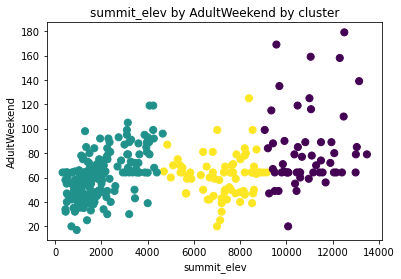

In [66]:
plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('summit_elev')
plt.ylabel('AdultWeekend')
plt.title('summit_elev by AdultWeekend by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

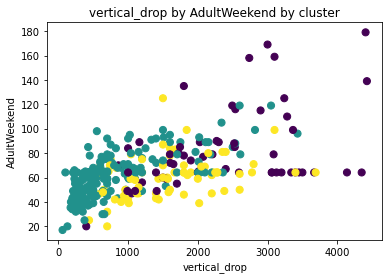

In [65]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('vertical_drop')
plt.ylabel('AdultWeekend')
plt.title('vertical_drop by AdultWeekend by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

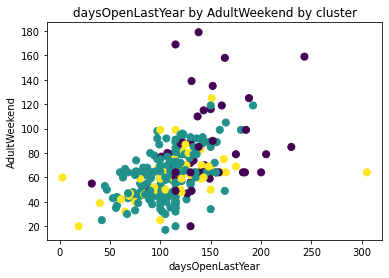

In [67]:
plt.scatter(df['daysOpenLastYear'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('daysOpenLastYear')
plt.ylabel('AdultWeekend')
plt.title('daysOpenLastYear by AdultWeekend by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

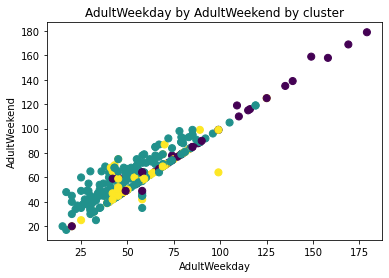

In [68]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekday by AdultWeekend by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

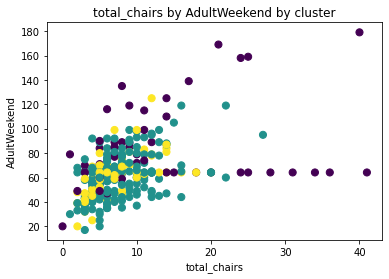

In [69]:
plt.scatter(df['total_chairs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100) #ac not defined??
plt.xlabel('total_chairs')
plt.ylabel('AdultWeekend')
plt.title('total_chairs by AdultWeekend by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [71]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

FileNotFoundError: [Errno 2] No such file or directory: 'models/model.joblib'

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [ ]:
#PUT HERE?

In [72]:
df.to_csv("step6FINAL_output.csv", index=False)